# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Tsamarah Muthi'ah Abdullah]
- **Email:** [a135xaf486@devacademy.id]
- **ID Dicoding:** [a135xaf48]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah? Apa faktor yang mempengaruhinya?
- Pertanyaan 2 : Seberapa besar pengaruh cuaca terhadap penurunan jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit # Menginstal Streamlit untuk membuat dashboard.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

## Data Wrangling

### Gathering Data

In [4]:
import pandas as pd

# Load dataset
df_day = pd.read_csv('/content/day.csv')
df_hour = pd.read_csv('/content/hour.csv')

# Tampilkan 5 baris pertama dari masing-masing dataset
print("Day Dataset:")
display(df_day.head())

print("\nHour Dataset:")
display(df_hour.head())

Day Dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Hour Dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Jumlah penyewa terdaftar (registered users) jauh lebih tinggi dibanding penyewa tidak terdaftar (casual users).
- Ada perbedaan jumlah peminjaman antara hari kerja(workingday) dan akhir pekan(weekday).

### Assessing Data

In [5]:
# Cek informasi dataset
print("Dataset Day:")
df_day.info()
print("\nDataset Hour:")
df_hour.info()

# Cek jumlah missing values
print("\nMissing values in Day dataset:")
print(df_day.isnull().sum())

print("\nMissing values in Hour dataset:")
print(df_hour.isnull().sum())

# Cek duplikasi
print("\nDuplicated rows in Day dataset:", df_day.duplicated().sum())
print("Duplicated rows in Hour dataset:", df_hour.duplicated().sum())

Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 

**Insight:**
- Tidak ada missing values
- Tidak ada duplikasi

### Cleaning Data

In [6]:
# Hapus data duplikat jika ada
df_day = df_day.drop_duplicates()
df_hour = df_hour.drop_duplicates()

# Konversi tipe data dteday jika diperlukan
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Konfirmasi perubahan
print("\nUpdated Day Dataset:")
df_day.info()

print("\nUpdated Hour Dataset:")
df_hour.info()


Updated Day Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: d

**Insight:**
- Kolom dteday sudah dikonversi menjadi tipe datetime64[ns]
- Tidak ada missing values ataupun duplikasi dalam data

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
# Statistik deskriptif untuk dataset harian dan per jam
print(df_day.describe())
print(df_hour.describe())

# Agregasi jumlah penyewaan sepeda berdasarkan jam
hourly_rentals = df_hour.groupby('hr').agg(avg_rentals=('cnt', 'mean')).reset_index()

# Pengaruh cuaca terhadap jumlah penyewaan sepeda
weather_rentals = df_day.groupby('weathersit').agg(avg_rentals=('cnt', 'mean')).reset_index()

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    0.495385    0.474354    0.627894   
min      0.000000    0.000000    0.000000    0.059130 

**Insight:**
- Hari kerja lebih banyak memiliki penyewaan dibandingkan hari libur.
- Registered users lebih dominan dibanding casual users.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah? Apa faktor yang mempengaruhinya?

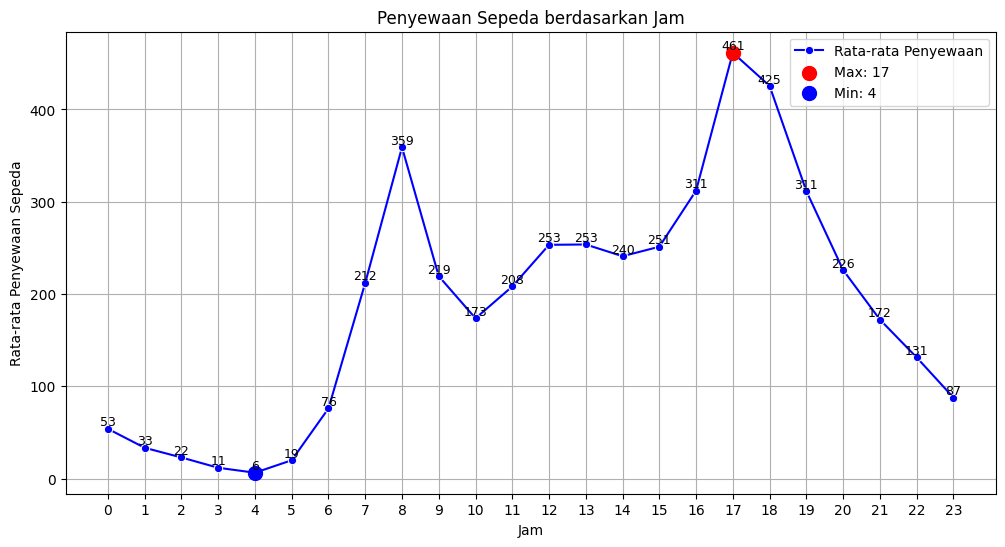

Rata-rata penyewaan sepeda per jam: 188 sepeda.
Total keseluruhan rata-rata penyewaan sepeda per jam: 4523 sepeda.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan jam dengan penyewaan tertinggi dan terendah
max_hour = hourly_rentals.loc[hourly_rentals['avg_rentals'].idxmax()]
min_hour = hourly_rentals.loc[hourly_rentals['avg_rentals'].idxmin()]

# Visualisasi penyewaan sepeda per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='avg_rentals', data=hourly_rentals, marker='o', label='Rata-rata Penyewaan', color='b')

# Menandai jam dengan penyewaan tertinggi dan terendah
plt.scatter(max_hour['hr'], max_hour['avg_rentals'], color='red', label=f'Max: {int(max_hour["hr"])}', s=100, zorder=3)
plt.scatter(min_hour['hr'], min_hour['avg_rentals'], color='blue', label=f'Min: {int(min_hour["hr"])}', s=100, zorder=3)

# Tambahkan nilai rata-rata penyewaan di setiap titik
for x, y in zip(hourly_rentals['hr'], hourly_rentals['avg_rentals']):
    plt.text(x, y, f"{int(y)}", ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(range(0, 24))
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Penyewaan Sepeda berdasarkan Jam')
plt.legend()
plt.grid()
plt.show()

# Menampilkan hasil perhitungan rata-rata dan total penyewaan sepeda
avg_rentals_overall = hourly_rentals['avg_rentals'].mean()
total_rentals_overall = hourly_rentals['avg_rentals'].sum()

print(f"Rata-rata penyewaan sepeda per jam: {round(avg_rentals_overall)} sepeda.")
print(f"Total keseluruhan rata-rata penyewaan sepeda per jam: {round(total_rentals_overall)} sepeda.")

### Pertanyaan 2: Seberapa besar pengaruh cuaca terhadap penurunan jumlah penyewa sepeda?

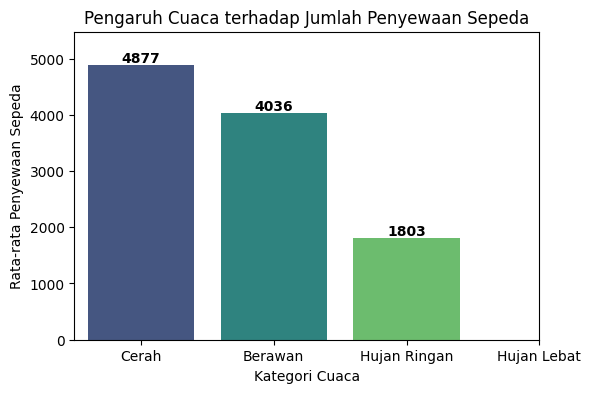

In [37]:
# Buat plot menggunakan seaborn dengan hue untuk menghindari warning
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='weathersit', y='avg_rentals', hue='weathersit', data=weather_rentals, palette="viridis", legend=False)

# Tambahkan label di atas batang
for i, row in enumerate(weather_rentals.itertuples(), start=0):
    plt.text(i, row.avg_rentals + 50, f"{row.avg_rentals:.0f}", ha='center', fontsize=10, fontweight='bold')

# Konfigurasi label dan judul
plt.xlabel("Kategori Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat"])
plt.ylim(0, weather_rentals['avg_rentals'].max() + 600)  # mengatur batas atas agar label terlihat jelas

# Tampilkan plot
plt.show()

**Insight:**
- Jam penyewaan sepeda paling tinggi terjadi pada pukul 17.00 dengan rata-rata penyewaan sepeda sebanyak 461 sepeda, sedangkan jam penyewaan sepeda paling rendah yaitu pada pukul 4.00 dengan rata-rata penyewaan sepeda sebanyak 6 sepeda.
- Cuaca dengan penyewaan sepeda tertinggi terjadi pada cuaca cerah dengan rata-rata sebanyak 4877 sepeda, sedangkan cuaca dengan penyewaan sepeda terendah terjadi pada cuaca hujan yaitu rata-rata sebanyak 1803 sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah? Apa faktor yang mempengaruhinya?
1. Penyewaan sepeda paling tinggi terjadi pada pukul 17.00 di hari kerja dengan rata-rata 525 sepeda. Hal ini kemungkinan besar disebabkan oleh jam pulang kerja, di mana banyak pekerja atau mahasiswa menggunakan sepeda sebagai sarana transportasi untuk kembali ke rumah.
2. Penyewaan sepeda terendah terjadi pada pukul 04.00, dengan rata-rata 6 sepeda. Faktor utama yang mempengaruhi hal ini adalah waktu yang masih dini hari, di mana sebagian besar orang masih beristirahat dan belum memulai aktivitas.

- Conclution pertanyaan 2 : Seberapa besar pengaruh cuaca terhadap penurunan jumlah penyewa sepeda?
1. Penyewaan sepeda tertinggi terjadi saat cuaca cerah, dengan rata-rata 4.877 sepeda. Kondisi ini ideal bagi pengguna karena jalanan kering dan nyaman untuk bersepeda.
2. Penyewaan sepeda turun drastis saat cuaca hujan, dengan rata-rata hanya 1803 sepeda.